In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Data
covid_data = pd.read_csv(r'D:\MLDataset\Coviddataset.csv')

#Total number of records
total_records = covid_data.shape[0]
print("Total number of records:", total_records)



Total number of records: 270


In [2]:
#Total number of variables (columns)
total_variables = covid_data.shape[1]
print("Total number of variables:", total_variables)


Total number of variables: 7


In [3]:
#List of column names (variables)
columns = covid_data.columns
print("Column names:", columns)

Column names: Index(['Sno', 'Date', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths'],
      dtype='object')


In [4]:
#Summary statistics for numeric columns
summary_stats = covid_data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
               Sno  ConfirmedIndianNational  ConfirmedForeignNational  \
count  270.000000               270.000000                270.000000   
mean   135.500000                 5.551852                  1.329630   
std     78.086491                 8.339625                  3.587288   
min      1.000000                 0.000000                  0.000000   
25%     68.250000                 1.000000                  0.000000   
50%    135.500000                 3.000000                  0.000000   
75%    202.750000                 6.000000                  0.000000   
max    270.000000                60.000000                 14.000000   

            Cured      Deaths  
count  270.000000  270.000000  
mean     0.603704    0.092593  
std      1.461522    0.290399  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    0.000000  
max      9.000000    1.000000  


In [5]:
#Checking for any missing data
missing_data = covid_data.isnull().sum()
print("Missing data for each column:\n", missing_data)

Missing data for each column:
 Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64


In [6]:
#Viewing the first few rows of the dataset
head = covid_data.head()
print("First few rows of the dataset:\n", head)

First few rows of the dataset:
    Sno        Date State/UnionTerritory  ConfirmedIndianNational  \
0    1  30-01-2020               Kerala                        1   
1    2  31-01-2020               Kerala                        1   
2    3  01-02-2020               Kerala                        2   
3    4  02-02-2020               Kerala                        3   
4    5  03-02-2020               Kerala                        3   

   ConfirmedForeignNational  Cured  Deaths  
0                         0      0       0  
1                         0      0       0  
2                         0      0       0  
3                         0      0       0  
4                         0      0       0  


In [7]:
#View the last few rows of the dataset
tail = covid_data.tail()
print("Last 5 rows:\n", tail)

Last 5 rows:
      Sno        Date State/UnionTerritory  ConfirmedIndianNational  \
265  266  21-03-2020    Jammu and Kashmir                        4   
266  267  21-03-2020               Ladakh                       13   
267  268  21-03-2020        Uttar Pradesh                       23   
268  269  21-03-2020          Uttarakhand                        3   
269  270  21-03-2020          West Bengal                        3   

     ConfirmedForeignNational  Cured  Deaths  
265                         0      0       0  
266                         0      0       0  
267                         1      9       0  
268                         0      0       0  
269                         0      0       0  


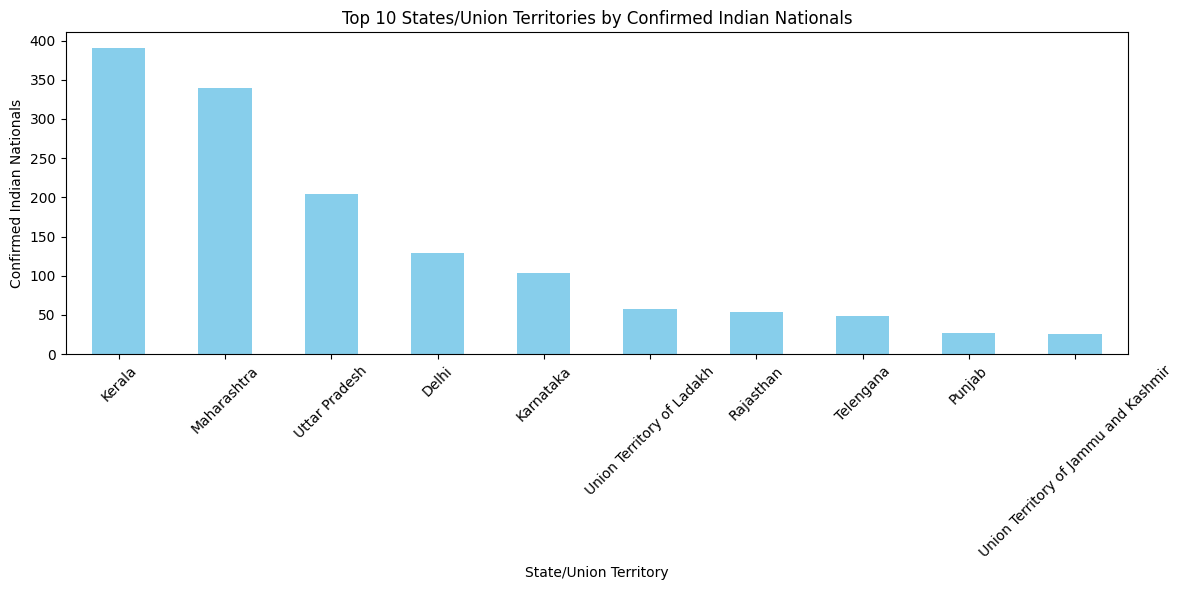

In [8]:
# Bar chart of confirmed cases by state
state_counts = covid_data.groupby('State/UnionTerritory')['ConfirmedIndianNational'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
state_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States/Union Territories by Confirmed Indian Nationals')
plt.xlabel('State/Union Territory')
plt.ylabel('Confirmed Indian Nationals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\samik\AppData\Local\Temp\ipykernel_18976\1500707517.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  covid_data['Date'] = pd.to_datetime(covid_data['Date'])


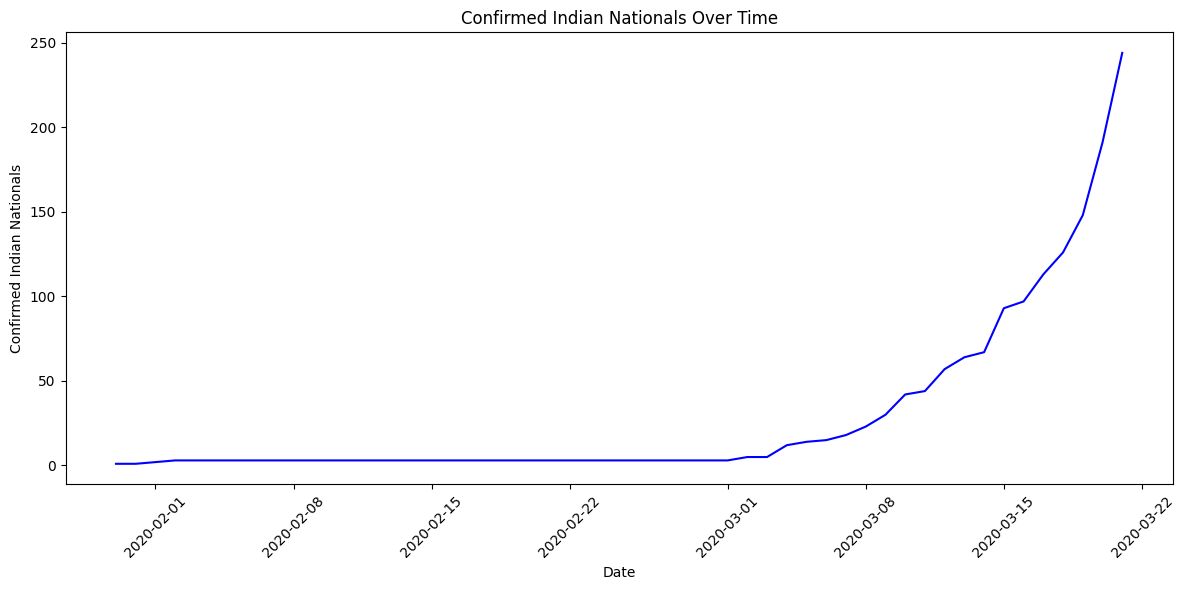

In [12]:
# Make sure 'Date' is in datetime format
covid_data['Date'] = pd.to_datetime(covid_data['Date'])

# Group by date and sum the confirmed cases
daily_cases = covid_data.groupby('Date')['ConfirmedIndianNational'].sum().reset_index()
# Line chart for confirmed cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_cases, x='Date', y='ConfirmedIndianNational', color='b')
plt.title('Confirmed Indian Nationals Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Indian Nationals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

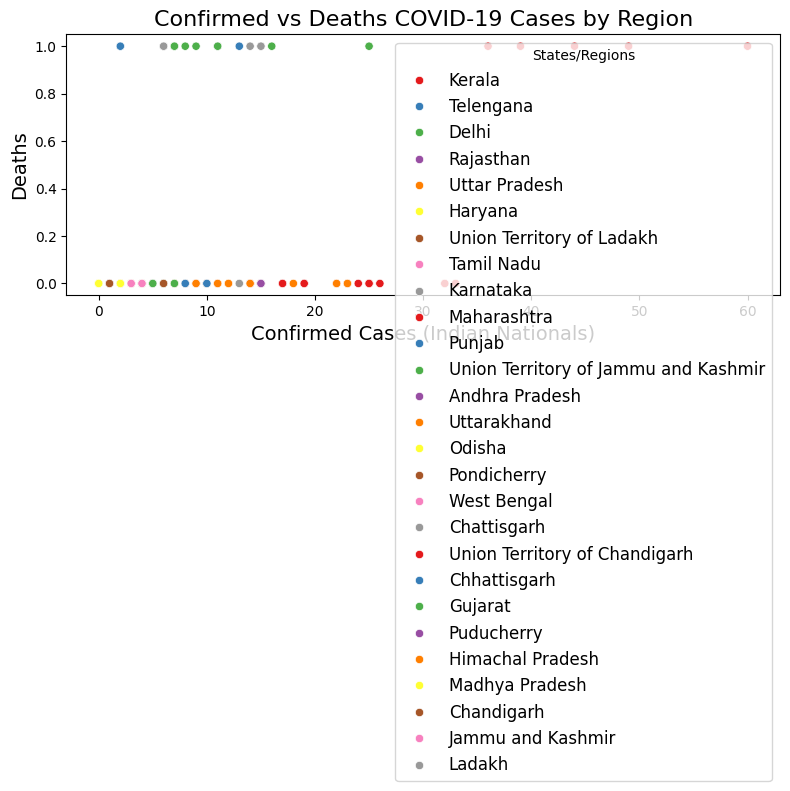

In [13]:
# Scatter plot for confirmed cases vs. deaths
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ConfirmedIndianNational', y='Deaths', data=covid_data, hue='State/UnionTerritory', palette='Set1')
plt.title('Confirmed vs Deaths COVID-19 Cases by Region', fontsize=16)
plt.xlabel('Confirmed Cases (Indian Nationals)', fontsize=14)
plt.ylabel('Deaths', fontsize=14)
plt.legend(title="States/Regions", fontsize=12)
plt.tight_layout()
plt.show()